# The Spotify Tracks Dataset:

This is a dataset of Spotify tracks over a range of 114 different genres. Each track is associated with the following features including the artist, track name, and various audio features. We decided to focus on predicting `track_genre` given the dataset's numerical features while setting aside the categorical features like `artists`, `album_name`, and `track_name` which may not be as informative.

</br>

`track_id`: The Spotify ID for the track

`artists`: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

`album_name`: The album name in which the track appears

`track_name`: Name of the track

`popularity`: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

`duration_ms`: The track length in milliseconds

`explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

`danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

`energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

`key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

`loudness`: The overall loudness of a track in decibels (dB)

`mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

`speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

`acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

`liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

`valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

`tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

`time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

`track_genre`: The genre in which the track belongs


# I. Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [2]:
# Load the dataset
df_raw = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df_raw.head(10)

Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Soundtrack)   
4                                                 Hold On   
5                                    Days I Will Remember   
6                             Is There Anybody Out There?   
7                     We Sing. We Dance. We Steal Things.   
8                     We Sing. We Dance. We Steal Things.   
9                                                  Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580   0.7150   87.917               4    acoustic  
1          0.000006    0.1010   0.2670   77.489               4    acoustic  
2          0.000000    0.1170   0.1200   76.332               4    acoustic  
3          0.000071    0.1320   0.1430  181.740               3    acoustic  
4          0.000000    0.0829   0.1670  119.949               4    acoustic  
5          0.000000    0.1890   0.6660   98.017               4    acoustic  
6          0.000003    0.0913   0.0765  141.284               3    acoustic  
7          0.000000    0.0973   0.7120  150.960               4    acoustic  
8          0.000000    0.1510   0.6690  130.088               4    acoustic  
9          0.004190    0.0735   0.1960   78.899               4    acoustic

In [3]:
# Examine the number of features and observations
df_raw.shape

(114000, 21)

## Checking for feature relevance, duplicates, and missing data:

In [4]:
# Examine features given by the dataset
df_raw.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
# Examine feature data types and missingness
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We see that the datset has 114000 samples for 21 features with the only missing data being `artists`, `album_name`, and `track_name` each having 1 null observation. Since this is not many observations, it is safe to just drop them.

In [6]:
df_raw.dropna(axis=0,inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [7]:
# Ensuring that 'track_id' and 'Unnamed: 0" are entirely arbitrary
print("track_id: ",df_raw.track_id.nunique(), "/",113999)
print("Unnamed: 0: ",df_raw['Unnamed: 0'].nunique(), "/",113999)

track_id:  89740 / 113999
Unnamed: 0:  113999 / 113999


The feature `Unnamed: 0` is unique per track, thus, can be removed. However, `track_id` seems to have duplicates, perhaps in terms of nominal variables like `explicit`, `mode`, `key`, or `track_genre` since there can be different versions of the same song in terms of these variables. We will isolate each feature as a potential explanation for the duplicates.

In [8]:
# Dropping the feature 'Unnamed: 0"
df_raw.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Sample the first 20 rows that have duplicated track IDs
dup_tracks = df_raw[df_raw.duplicated(subset=['track_id'], keep=False)].sort_values(by='track_id')
dup_tracks.head(20)

track_id                       artists  \
15028   001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby   
103211  001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby   
85578   001YQlnDSduXd5LgBd66gT                   Soda Stereo   
100420  001YQlnDSduXd5LgBd66gT                   Soda Stereo   
91801   003vvx7Niy0yvhvHt4a68B                   The Killers   
3257    003vvx7Niy0yvhvHt4a68B                   The Killers   
2106    003vvx7Niy0yvhvHt4a68B                   The Killers   
33178   004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu   
94239   004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu   
97533   006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
77391   006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
35138   006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
112131  006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
64662   006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
62346   006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
63142   006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
64246   00970cTs7LnxWt0d5Qk08m               Ella Fitzgerald   
8095    00970cTs7LnxWt0d5Qk08m               Ella Fitzgerald   
71588   00B7SBwrjbycLMOgAmeIU8         Red Hot Chili Peppers   
2870    00B7SBwrjbycLMOgAmeIU8         Red Hot Chili Peppers   

                             album_name  \
15028                           New RnB   
103211                          New RnB   
85578          Soda Stereo (Remastered)   
100420         Soda Stereo (Remastered)   
91801                          Hot Fuss   
3257                           Hot Fuss   
2106                           Hot Fuss   
33178                      Loners Diary   
94239                      Loners Diary   
97533   CP 25 Anos (Ao Vivo em Aracaju)   
77391   CP 25 Anos (Ao Vivo em Aracaju)   
35138   CP 25 Anos (Ao Vivo em Aracaju)   
112131        Bezginin Gizli Mektupları   
64662         Bezginin Gizli Mektupları   
62346         Bezginin Gizli Mektupları   
63142         Bezginin Gizli Mektupları   
64246             Weihnachtslieder 2022   
8095              Weihnachtslieder 2022   
71588       Return of the Dream Canteen   
2870        Return of the Dream Canteen   

                                      track_name  popularity  duration_ms  \
15028                                     Better           0       176320   
103211                                    Better           0       176320   
85578   El Tiempo Es Dinero - Remasterizado 2007          38       177266   
100420  El Tiempo Es Dinero - Remasterizado 2007          38       177266   
91801                             Mr. Brightside          86       222973   
3257                              Mr. Brightside          86       222973   
2106                              Mr. Brightside          86       222973   
33178                                   Lovemark          58       219482   
94239                                   Lovemark          58       219482   
97533             Agora Estou Sofrendo - Ao Vivo          47       260510   
77391             Agora Estou Sofrendo - Ao Vivo          47       260510   
35138             Agora Estou Sofrendo - Ao Vivo          47       260510   
112131                        Yemyeşil Bir Deniz          44       358173   
64662                         Yemyeşil Bir Deniz          44       358173   
62346                         Yemyeşil Bir Deniz          44       358173   
63142                         Yemyeşil Bir Deniz          44       358173   
64246                                Sleigh Ride           0       175986   
8095                                 Sleigh Ride           0       175986   
71588                                  Reach Out          66       251588   
2870                                   Reach Out          66       251588   

        explicit  danceability  energy  key  loudness  mode  speechiness  \
15028      False         0.613   0.471    1    -6.644     0       0.1070   
103

In [10]:
# number of complete duplicates
dup_num = dup_tracks[dup_tracks.duplicated(keep=False)].shape[0]
dup_num

894

In [11]:
# Dropping the feature 'track_id"
df_raw.drop('track_id', axis=1, inplace=True)

# Remove the duplicates
df_raw.drop_duplicates(inplace=True)

In [12]:
print("number of duplicates in terms of all other features except for...")
cols_to_check = list(dup_tracks.columns)
dup_cols = list(dup_tracks.columns)
for i  in cols_to_check:
  dup_cols.remove(i)
  print(i,': ', dup_tracks[dup_tracks.duplicated(subset=dup_cols, keep=False)].shape[0]-dup_num)
  dup_cols.append(i)

number of duplicates in terms of all other features except for...
track_id :  151
artists :  0
album_name :  0
track_name :  0
popularity :  0
duration_ms :  0
explicit :  0
danceability :  0
energy :  0
key :  0
loudness :  0
mode :  0
speechiness :  0
acousticness :  0
instrumentalness :  0
liveness :  0
valence :  0
tempo :  0
time_signature :  0
track_genre :  38948


The duplicates seems to be the exact same tracks listed under either multiple genres (38948 of these) or listed under different track IDs (151). We will remove the tracks with duplicated track_IDs but keep the tracks listed under multiple genres since `track_genre` is our response variable.

In [13]:
print("number of duplicates in terms of all other features except for...")
cols_to_check = list(df_raw.columns)
dup_cols = list(df_raw.columns)
for i  in cols_to_check:
  dup_cols.remove(i)
  print(i,': ', df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].shape[0])
  dup_cols.append(i)

number of duplicates in terms of all other features except for...
artists :  0
album_name :  9238
track_name :  2
popularity :  293
duration_ms :  0
explicit :  0
danceability :  0
energy :  0
key :  0
loudness :  0
mode :  0
speechiness :  0
acousticness :  0
instrumentalness :  0
liveness :  0
valence :  0
tempo :  2
time_signature :  0
track_genre :  38967


There are tracks that are exactly the same but received different `popularity` ratings. According to the features documentation, `popularity` is "calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are." In order to reflect the performance of the tracks, we will keep the observation with the highest popularity rating and remove the remaining duplicates.

In [14]:
# sort in descending order by popularity
df_raw.sort_values(by='popularity',ascending=False).head(20)

# keep only the first occurance of the duplicate (i.e. observation with the max popularity value)
dup_cols = list(df_raw.columns)
dup_cols.remove('popularity')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

There are also tracks with the exact same values for all features except `track_name`, `album_name`, and `tempo`. We will examine these duplications to ensure it is fair to remove their duplicates.

In [15]:
# same track under different names??
dup_cols = list(df_raw.columns)
dup_cols.remove('track_name')
df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].head(10)

artists                        album_name           track_name  \
49371  UVIQUE  InfeXious Euphoric - Chapter One              Falling   
49376  UVIQUE  InfeXious Euphoric - Chapter One  Falling - Radio Mix   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
49371           0       178374     False          0.43   0.781    3    -5.601   
49376           0       178374     False          0.43   0.781    3    -5.601   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
49371     1       0.0334        0.0108             0.734    0.0818    0.206   
49376     1       0.0334        0.0108             0.734    0.0818    0.206   

        tempo  time_signature track_genre  
49371  75.017               4   hardstyle  
49376  75.017               4   hardstyle

In [16]:
# same track under different album names??
dup_cols = list(df_raw.columns)
dup_cols.remove('album_name')
df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].head(10)

artists                          album_name  \
26                Jason Mraz               Holly Jolly Christmas   
28                Jason Mraz                      Christmas Time   
29                Jason Mraz              Perfect Christmas Hits   
30                Jason Mraz                     Merry Christmas   
31                Jason Mraz      Christmas Music - Holiday Hits   
33  Brandi Carlile;Sam Smith        Human - Best Adult Pop Tunes   
34  Brandi Carlile;Sam Smith  Feeling Good - Adult Pop Favorites   
35  Brandi Carlile;Sam Smith                   Mellow Bars R'n'B   
36               KT Tunstall              Chill Christmas Dinner   
39               KT Tunstall                     sadsadchristmas   

               track_name  popularity  duration_ms  explicit  danceability  \
26      Winter Wonderland           0       131760     False         0.620   
28      Winter Wonderland           0       131760     False         0.620   
29      Winter Wonderland           0       131760     False         0.620   
30      Winter Wonderland           0       131760     False         0.620   
31      Winter Wonderland           0       131760     False         0.620   
33           Party of One           0       259558     False         0.296   
34           Party of One           0       259558     False         0.296   
35           Party of One           0       259558     False         0.296   
36  Lonely This Christmas           0       257493     False         0.409   
39  Lonely This Christmas           0       257493     False         0.409   

    energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
26   0.309    5    -9.209     1       0.0495         0.788          0.000000   
28   0.309    5    -9.209     1       0.0495         0.788          0.000000   
29   0.309    5    -9.209     1       0.0495         0.788          0.000000   
30   0.309    5    -9.209     1       0.0495         0.788          0.000000   
31   0.309    5    -9.209     1       0.0495         0.788          0.000000   
33   0.206    0   -11.799     1       0.0412         0.782          0.000225   
34   0.206    0   -11.799     1       0.0412         0.782          0.000225   
35   0.206    0   -11.799     1       0.0412         0.782          0.000225   
36   0.153    6   -10.740     0       0.0306         0.939          0.000026   
39   0.153    6   -10.740     0       0.0306         0.939          0.000026   

    liveness  valence    tempo  time_signature track_genre  
26    0.1460    0.664  145.363               4    acoustic  
28    0.1460    0.664  145.363               4    acoustic  
29    0.1460    0.664  145.363               4    acoustic  
30    0.1460    0.664  145.363               4    acoustic  
31    0.1460    0.664  145.363               4    acoustic  
33    0.0959    0.202  165.400               4    acoustic  
34    0.0959    0.202  165.400               4    acoustic  
35    0.0959    0.202  165.400               4    acoustic  
36    0.1080    0.180   85.262               4    acoustic  
39    0.1080    0.180   85.262               4    acoustic

In [17]:
# same track with different tempo??
dup_cols = list(df_raw.columns)
dup_cols.remove('tempo')
df_raw[df_raw.duplicated(subset=dup_cols, keep=False)].head(10)

artists           album_name            track_name  \
59208  AMONGST THE ASHES  Agonizing Awakening  Exordium of Sickness   
59916  AMONGST THE ASHES  Agonizing Awakening  Exordium of Sickness   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
59208           0        80948     False         0.423   0.853    1   -10.133   
59916           0        80948     False         0.423   0.853    1   -10.133   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
59208     1       0.0382       0.00044              0.69     0.145    0.107   
59916     1       0.0382       0.00044              0.69     0.145    0.107   

        tempo  time_signature track_genre  
59208  89.980               4     iranian  
59916  89.977               4     iranian

In [18]:
# it is fair to remove their duplicates
dup_cols = list(df_raw.columns)
dup_cols.remove('track_name')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

dup_cols = list(df_raw.columns)
dup_cols.remove('album_name')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

dup_cols = list(df_raw.columns)
dup_cols.remove('tempo')
df_raw.drop_duplicates(subset=dup_cols, keep='first', inplace=True)

In [19]:
# No negative values except for "loudness" which is reasonable since decibels can be negative
(df_raw.select_dtypes(exclude='object')<0).any()

popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness             True
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
dtype: bool

We are now left with 106811 observations after removing duplicates and obervations with missing values.

In [20]:
df_raw.shape

(106811, 19)

### Handling the categorical features:

The features `artists`, `album_name`, and `track_name` cannot be encoded by category in a meaningful way. Since analyzing text is out of scope for this project, we will not be considering these features.

In [21]:
# Unique name values
print("artists: ",df_raw.artists.nunique(), "/",106811)
print("album_name: ",df_raw.album_name.nunique(), "/",106811)
print("track_name: ",df_raw.track_name.nunique(), "/",106811)

artists:  31437 / 106811
album_name:  46512 / 106811
track_name:  73607 / 106811


The features `popularity`, `explicit`, `key`, `mode`, and `time_signature` are categorical variables given by numerical values. We will one-hot encode the features `explicit` and `mode` since they are nominal, meaning, their categories lack a natural order (`mode` is already encoded). On the other hand, `popularity`,`key`, and `time_signature` are quasi-interval variables so we will leave them alone to preserve their natural order.

In [22]:
# Encode 'explicit' as 0 or 1
label_encoder = preprocessing.LabelEncoder()
df_raw['explicit']=label_encoder.fit_transform(df_raw['explicit'])
df_raw.sample(n=20)

artists  \
71975                                                                               Hinder   
113065                                                                        Phil Wickham   
57114                                                                         Mohan Kannan   
20720                                                                Ty Dolla $ign;Kehlani   
86950                                                                         Joy Division   
101557                                                                   Malik Jeremiassen   
36388                                                              So La Lune;Rouge Carmin   
35150                                                               Os Barões Da Pisadinha   
94475                                                                               PmBata   
93886                                                                          Vadim Kozin   
17952                                                                               Oli XL   
79625                                                                Yiruma;Ólafur Arnalds   
61780                                                                            PASSEPIED   
78908                                                                         Carina Crone   
89327   Sebastian Yatra;Rauw Alejandro;Manuel Turizo;Cosculluela;Lalo Ebratt;Llane;Dalmata   
32799                                                                          Gui Boratto   
14095                                                                              Cri-Cri   
75914                                                                     David Arkenstone   
86810                                                                             V-Osasto   
6529                                                                           Necrophobic   

                                                             album_name  \
71975                                              Take It To The Limit   
113065                                                   Hymn of Heaven   
57114                     Cocktail (Original Motion Picture Soundtrack)   
20720                                                           New RnB   
86950                                                       The Best Of   
101557                                                      The Journey   
36388                                                             Tsuki   
35150                                             Você Não Me Deu Moral   
94475                                                     I Would Never   
93886   Pojte vmeste, druzya! 100 zastolnyh pesen v 3 chastyah. Chast 2   
17952                                                     Mono No Aware   
79625                             We Contain Multitudes — piano reworks   
61780                                                         OTONARIさん   
78908                                                       Sailor Moon   
89327                                           Perreo Tenebroso Vol. 1   
32799                                                 Technics : Techno   
14095                               Las 100 Clásicas de Cri Cri, Vol. 2   
75914           Pure Sleep: Music And Nature Sounds For Peaceful Dreams   
86810                                             Kellokosken Prinsessa   
6529                                                 Dawn of the Damned   

                                   track_name  popularity  duration_ms  \
71975                             Without You          57       232266   
113065                      House of The Lord          52       256133   
57114                 Yaariyaan - Male Vocals          55       374173   
20720                                Universe           0       220138   
86950                 Love Will Tear Us Apart          66       206866   
101557                            The Journey          59       157000   
36388         

Additionally, we will check for class imbalance in these categorical features.

/var/folders/h8/frp0f1bd0v32l04p93kbg3f00000gn/T/ipykernel_30225/2397168134.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


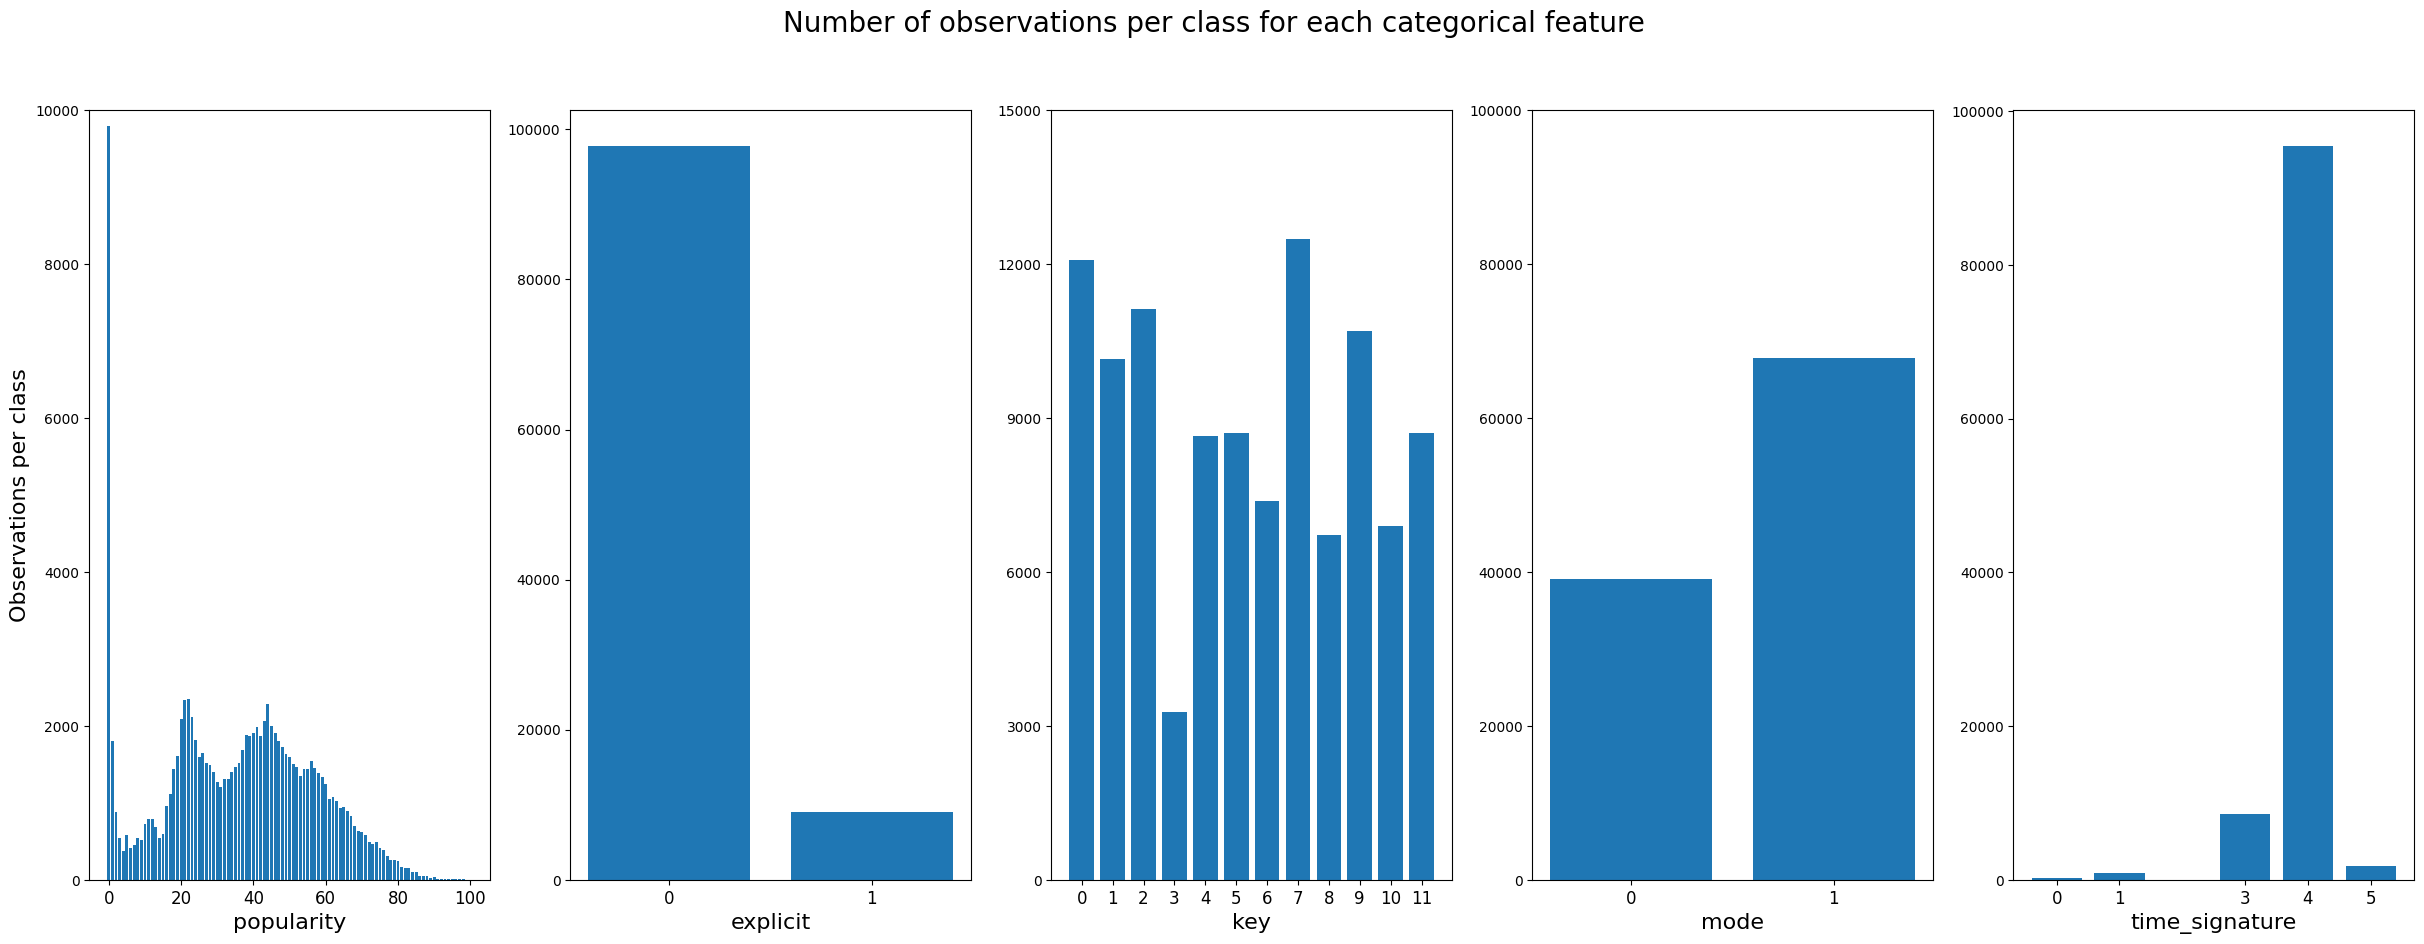

In [23]:
# Visualize the class imbalance in the categorical features
fig, axs = plt.subplots(1,5)
features = ['popularity','explicit','key', 'mode', 'time_signature']
col = 0
for i in features:
  val_count = df_raw[i].value_counts().rename_axis(i).reset_index(name='count')
  axs[col].bar(val_count[i], val_count['count'])
  axs[col].set_xlabel(i, fontsize=16)
  axs[col].set_xticks(val_count[i])
  axs[col].set_yticks(np.arange(0,106811,20000))
  axs[col].tick_params(axis='x', which='major', labelsize=12)

  if i=='popularity':
    axs[col].set_xticks(np.arange(0,101,20))
    axs[col].set_yticks(np.arange(0, 10001, 2000))
    axs[col].set_ylim(0, 10000)

  if i == 'key':
    axs[col].set_yticks(np.arange(0, 15001, 3000))
    axs[col].set_ylim(0, 15000)

  col += 1


axs[0].set_ylabel('Observations per class', fontsize=16)
plt.suptitle("Number of observations per class for each categorical feature", fontsize=20)
fig.set_figwidth(30)
fig.set_figheight(10)
fig.show()

Summary of class imbalances:

`popularity`: On a scale from 0 to 100, majority of the tracks were labeled as 0.

`explicit`: The non-explicit (`0`) class significantly dominates explicit (`1`) class.

`key`: Relatively balanced.

`mode`: The major scale (`1`) class somewhat dominates the minor scale (`0`) class.

`time_signature`: Tracks with time signature 4/4 (`4`) significantly outnumbers rest, followed by the time signature 3/4 (`3`).

### Examine the reponse variable `track_genre`:

In [24]:
df_raw.track_genre.nunique()

114

/var/folders/h8/frp0f1bd0v32l04p93kbg3f00000gn/T/ipykernel_30225/4190133790.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


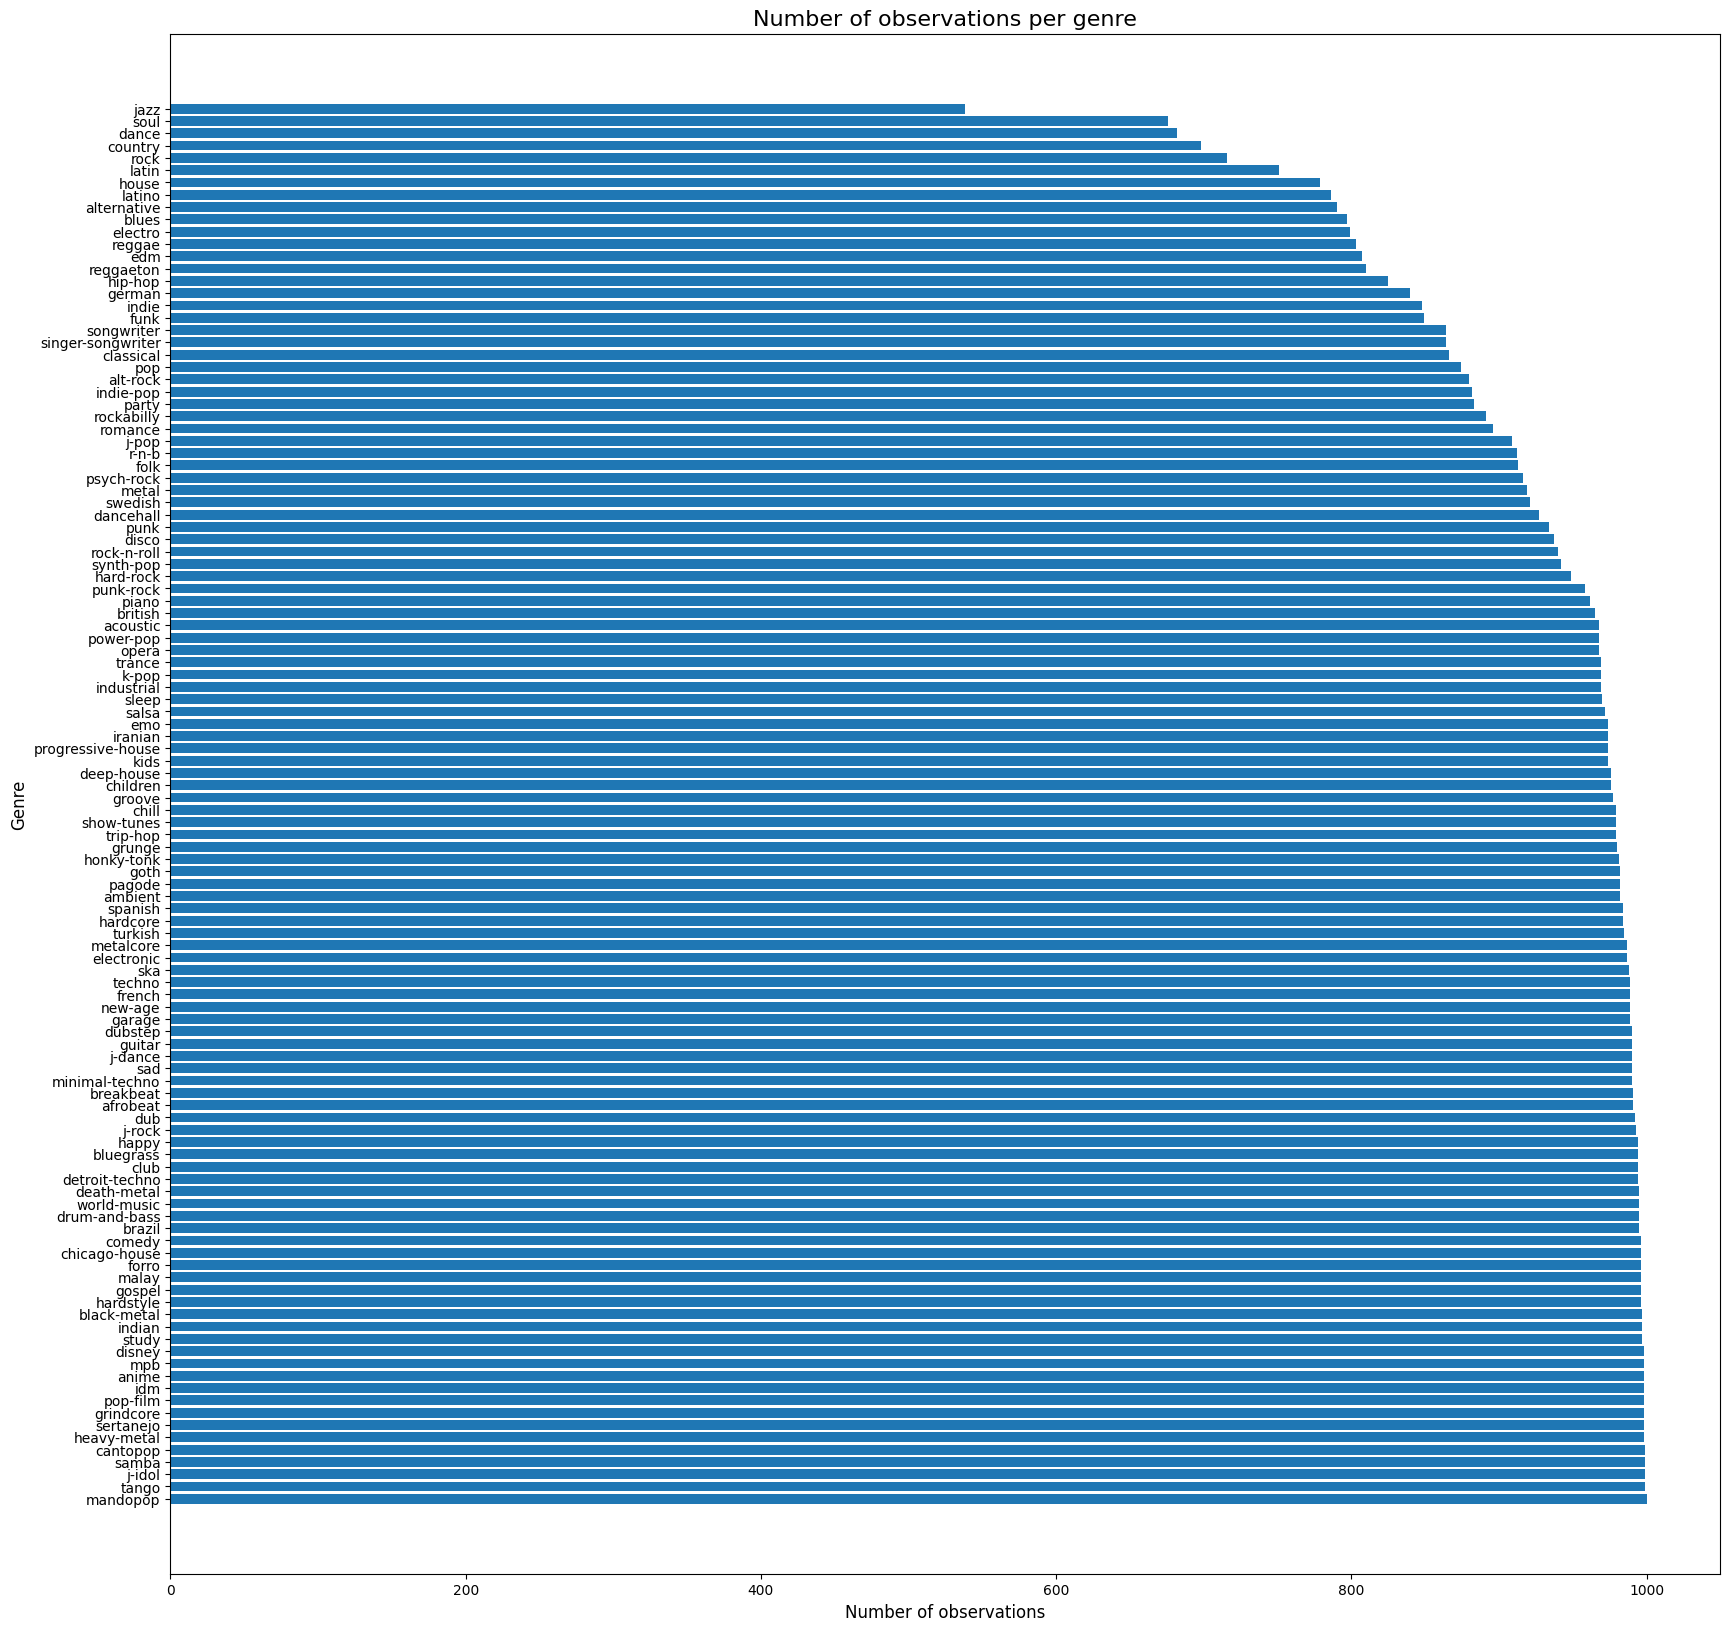

In [26]:
# Visualize any class imbalance in the response variable 'track_genre

fig, ax = plt.subplots()

val_count = df_raw['track_genre'].value_counts().rename_axis('track_genre').reset_index(name='count')
ax.barh(val_count['track_genre'], val_count['count'])
ax.set_ylabel('Genre', fontsize=12)
ax.set_xlabel('Number of observations', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_title("Number of observations per genre", fontsize=16)
fig.set_figwidth(20)
fig.set_figheight(20)
fig.show()

In [28]:
pd.set_option('display.max_rows', None)
df_raw['track_genre'].value_counts()

track_genre
mandopop             1000
tango                 999
j-idol                999
samba                 999
cantopop              999
heavy-metal           998
sertanejo             998
grindcore             998
pop-film              998
idm                   998
anime                 998
mpb                   998
disney                998
study                 997
indian                997
black-metal           997
hardstyle             996
gospel                996
malay                 996
forro                 996
chicago-house         996
comedy                996
brazil                995
drum-and-bass         995
world-music           995
death-metal           995
detroit-techno        994
club                  994
bluegrass             994
happy                 994
j-rock                993
dub                   992
afrobeat              991
breakbeat             991
minimal-techno        990
sad                   990
j-dance               990
guitar                990


The data is somewhat imbalanced in terms of the response variable `track_genre`. However, the ratio between the smallest class ("jazz") and largest class ("mandopop") is 538:1000, which is relatively acceptable rate.

In preparation for EDA,  we'll make a new copy of the data set with the columns `album_name`, `track_name`, and `artists` dropped and will keep only observations belonging to the top 20 genres by count in the data in order to preserve the amount of data we have to work with and allow for more robust and effective classification of track genre. With 114 classes and 15 features, most models are unable to accurately classify observations.

In [29]:
# Isolate the numerical data (i.e. drop the album, track, and artist names) and the response variable 'track_genre'
df_raw = df_raw.drop(columns=['album_name','track_name','artists'])
top20 = df_raw['track_genre'].value_counts(ascending=False)[:20].index
df_raw = df_raw[df_raw['track_genre'].isin(top20)]
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19955 entries, 5000 to 108999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        19955 non-null  int64  
 1   duration_ms       19955 non-null  int64  
 2   explicit          19955 non-null  int64  
 3   danceability      19955 non-null  float64
 4   energy            19955 non-null  float64
 5   key               19955 non-null  int64  
 6   loudness          19955 non-null  float64
 7   mode              19955 non-null  int64  
 8   speechiness       19955 non-null  float64
 9   acousticness      19955 non-null  float64
 10  instrumentalness  19955 non-null  float64
 11  liveness          19955 non-null  float64
 12  valence           19955 non-null  float64
 13  tempo             19955 non-null  float64
 14  time_signature    19955 non-null  int64  
 15  track_genre       19955 non-null  object 
dtypes: float64(9), int64(6), object(1)
memory

In [30]:
# Create a standardized version of the data for modeling purposes after EDA
ss = preprocessing.StandardScaler()
df = df_raw.copy()
num_cols = df.drop(columns='track_genre').columns
df[num_cols] = ss.fit_transform(df.drop(columns='track_genre'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19955 entries, 5000 to 108999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        19955 non-null  float64
 1   duration_ms       19955 non-null  float64
 2   explicit          19955 non-null  float64
 3   danceability      19955 non-null  float64
 4   energy            19955 non-null  float64
 5   key               19955 non-null  float64
 6   loudness          19955 non-null  float64
 7   mode              19955 non-null  float64
 8   speechiness       19955 non-null  float64
 9   acousticness      19955 non-null  float64
 10  instrumentalness  19955 non-null  float64
 11  liveness          19955 non-null  float64
 12  valence           19955 non-null  float64
 13  tempo             19955 non-null  float64
 14  time_signature    19955 non-null  float64
 15  track_genre       19955 non-null  object 
dtypes: float64(15), object(1)
memory usage: 2

In [31]:
# Create a scaled version of the data so that all values are between -1 and 1
mm = preprocessing.MinMaxScaler()
df_mm = df_raw.copy()
num_cols = df_mm.drop(columns='track_genre').columns
df_mm[num_cols] = mm.fit_transform(df_mm.drop(columns='track_genre'))
df_mm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19955 entries, 5000 to 108999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        19955 non-null  float64
 1   duration_ms       19955 non-null  float64
 2   explicit          19955 non-null  float64
 3   danceability      19955 non-null  float64
 4   energy            19955 non-null  float64
 5   key               19955 non-null  float64
 6   loudness          19955 non-null  float64
 7   mode              19955 non-null  float64
 8   speechiness       19955 non-null  float64
 9   acousticness      19955 non-null  float64
 10  instrumentalness  19955 non-null  float64
 11  liveness          19955 non-null  float64
 12  valence           19955 non-null  float64
 13  tempo             19955 non-null  float64
 14  time_signature    19955 non-null  float64
 15  track_genre       19955 non-null  object 
dtypes: float64(15), object(1)
memory usage: 2

# II. Exploratory Data Analysis

In [24]:
df.sample(10)

popularity  duration_ms  explicit  danceability    energy       key  \
54384   -1.412613     0.316920 -0.181294      0.976702  0.599810  1.061682   
55210    1.650196     1.244444 -0.181294     -0.971826  0.111061  1.625871   
74026    1.139728     0.059853 -0.181294     -0.277663 -0.897968 -0.912980   
12824    1.139728     0.147428 -0.181294      0.696601  0.970313 -0.912980   
69101    0.437834     0.440066 -0.181294      0.501748  0.682582  0.779587   
50085    0.054983    -0.497352 -0.181294     -1.726880  1.135857  1.061682   
42170   -1.157379    -0.741845  5.515904     -1.288461  1.399939 -1.195074   
97389    0.884494    -0.646145 -0.181294      1.518636  0.934839 -0.630885   
6034    -0.519294    -0.877322 -0.181294     -2.031337  1.151623  0.215398   
26933   -0.902145    -0.314015 -0.181294     -1.178857 -1.248764  0.497493   

       loudness      mode  speechiness  acousticness  instrumentalness  \
54384 -0.819268 -1.349109    -0.442136     -0.690465          2.234677   
55210  0.179987 -1.349109    -0.361902      0.790679         -0.542043   
74026 -0.103597  0.741230    -0.540667      0.672792         -0.542049   
12824  0.648232 -1.349109     0.374272     -0.636056         -0.542049   
69101  0.606388  0.741230    -0.292930     -0.563510         -0.542049   
50085  0.993446  0.741230    -0.108535     -1.130767         -0.541642   
42170  1.223362  0.741230     0.768399     -1.128732         -0.173831   
97389  0.855406 -1.349109     0.472804     -0.046621         -0.542049   
6034   0.733740  0.741230     0.080084     -1.131743          2.285986   
26933 -1.004383 -1.349109    -0.613863      1.615888          1.766859   

       liveness   valence     tempo  time_signature  track_genre  
54384 -0.249663 -0.256109  1.196783        0.241705          idm  
55210  0.218154 -0.180384 -1.195361        0.241705       indian  
74026 -0.593647 -0.905745 -1.062472       -2.113381          mpb  
12824 -0.753255  0.564904 -1.046021        0.241705     cantopop  
69101 -0.737661  0.796063 -0.371189       -2.113381        malay  
50085  0.264018  0.843889 -1.036955        0.241705  heavy-metal  
42170  0.135598 -0.036906 -0.397892        0.241705    grindcore  
97389  2.126113  0.871788  0.137524        0.241705    sertanejo  
6034   0.470408  1.138816  1.330332        0.241705  black-metal  
26933 -0.368911 -1.160817 -1.410998        0.241705       disney

In [25]:
# Examine the descriptive statistics of the numerical data
df.describe()

popularity   duration_ms      explicit  danceability        energy  \
count  1.995500e+04  19955.000000  1.995500e+04  1.995500e+04  1.995500e+04   
mean   2.050978e-16      0.000000 -3.988012e-17 -3.304353e-16  2.050978e-16   
std    1.000025e+00      1.000025  1.000025e+00  1.000025e+00  1.000025e+00   
min   -2.178315e+00     -2.097496 -1.812939e-01 -2.872858e+00 -2.521597e+00   
25%   -9.021446e-01     -0.583862 -1.812939e-01 -6.338779e-01 -7.797228e-01   
50%    1.826001e-01     -0.062605 -1.812939e-01  8.768604e-02  9.923667e-02   
75%    7.568767e-01      0.461311 -1.812939e-01  7.392248e-01  9.190733e-01   
max    3.436834e+00     27.786392  5.515904e+00  2.541613e+00  1.419647e+00   

                key      loudness          mode   speechiness  acousticness  \
count  1.995500e+04  1.995500e+04  1.995500e+04  1.995500e+04  1.995500e+04   
mean   8.759384e-17 -4.557728e-17  8.830599e-17 -5.412302e-17 -9.115457e-17   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -1.477168e+00 -7.289416e+00 -1.349109e+00 -7.503996e-01 -1.131785e+00   
25%   -9.129795e-01 -4.655263e-01 -1.349109e+00 -5.660042e-01 -1.043219e+00   
50%   -6.669615e-02  1.902211e-01  7.412297e-01 -3.830164e-01 -1.645077e-01   
75%    7.795872e-01  7.005375e-01  7.412297e-01  1.293495e-01  8.994976e-01   
max    1.625871e+00  2.155076e+00  7.412297e-01  1.215587e+01  1.878866e+00   

       instrumentalness      liveness       valence         tempo  \
count      1.995500e+04  19955.000000  1.995500e+04  1.995500e+04   
mean       5.127444e-17      0.000000  1.709148e-16  4.158927e-16   
std        1.000025e+00      1.000025  1.000025e+00  1.000025e+00   
min       -5.420494e-01     -1.063757 -1.786541e+00 -3.078958e+00   
25%       -5.420494e-01     -0.657857 -8.300205e-01 -7.976322e-01   
50%       -5.419570e-01     -0.442294 -8.871751e-02  7.469095e-03   
75%       -2.221223e-01      0.337401  7.801215e-01  7.138510e-01   
max        2.473113e+00      3.433249  2.139177e+00  3.191446e+00   

       time_signature  
count    1.995500e+04  
mean    -1.370879e-16  
std      1.000025e+00  
min     -9.178637e+00  
25%      2.417046e-01  
50%      2.417046e-01  
75%      2.417046e-01  
max      2.596790e+00

Most of the features ranges between [0,1] while the rest vary drastically: some ranges betweem [0,100] (e.g. `popularity`), some [0,11] (e.g. `key`), or even to negative values (e.g. `loudness`). Thus, it will be important to standardize and/or mean center these features accordingly for the remainder of the project.


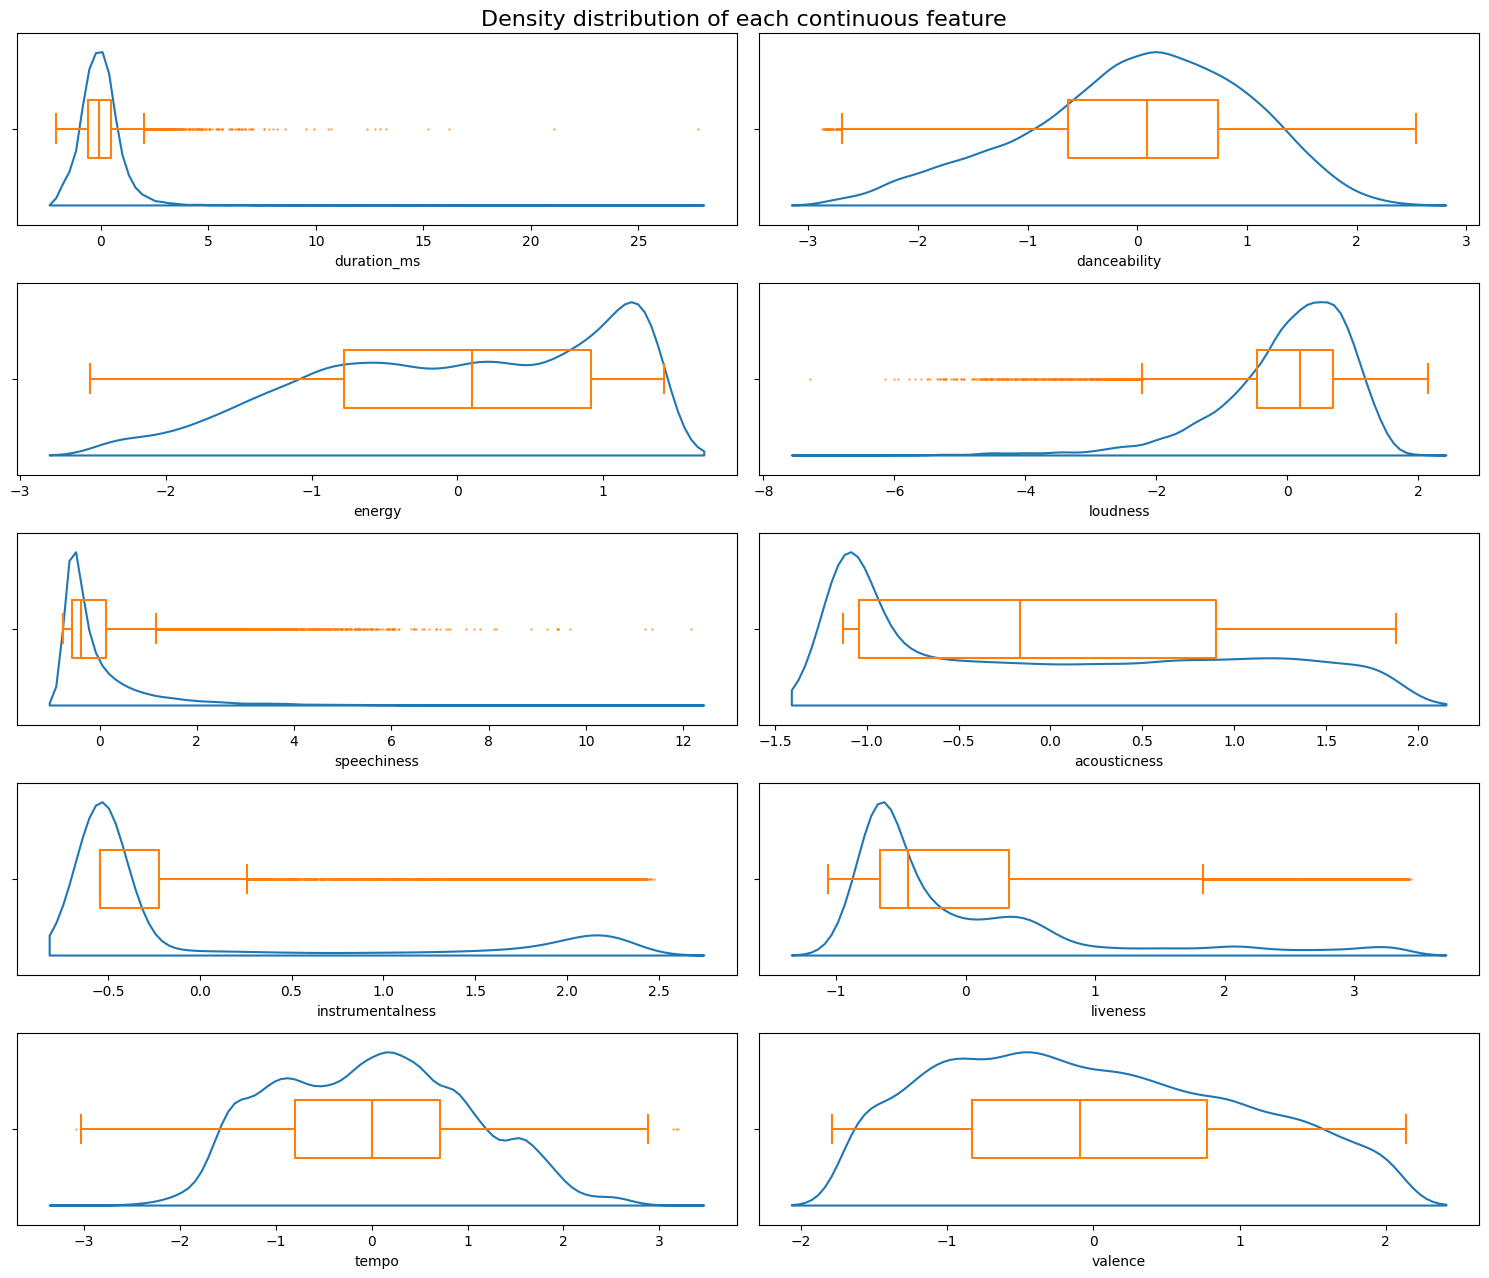

In [ ]:
# Plot the density distribution for each continuous variable
cts_cols = ['duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','valence']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 13))
col = 0
row = 0

for i in cts_cols:
  sns.violinplot(data=df, x=i, ax=axes[row][col], inner=None, fill=False, split=True) #inner_kws=dict(box_width=15, whis_width=2)
  sns.boxplot(data=df, x=i, fill=False, width=0.3, fliersize=0.5, boxprops={'zorder': 2}, ax=axes[row][col])
  axes[row][col].set_xlabel(i, fontsize=10)
  col+=1
  if col==2:
    col=0
    row+=1

plt.suptitle('Density distribution of each continuous feature', fontsize=16)
plt.tight_layout()

Like some of the categorical predictor variables, many of the continuous predictor variables are heavily skewed with a handful of outliers. This should be addressed depending on the assumptions made by different modeling techiques (e.g. distance-based clustering methods may be sensitive to outliers, linear regression assumes normality and homoscedasticity).

Text(0.5, 0.98, 'Mean values per genre')

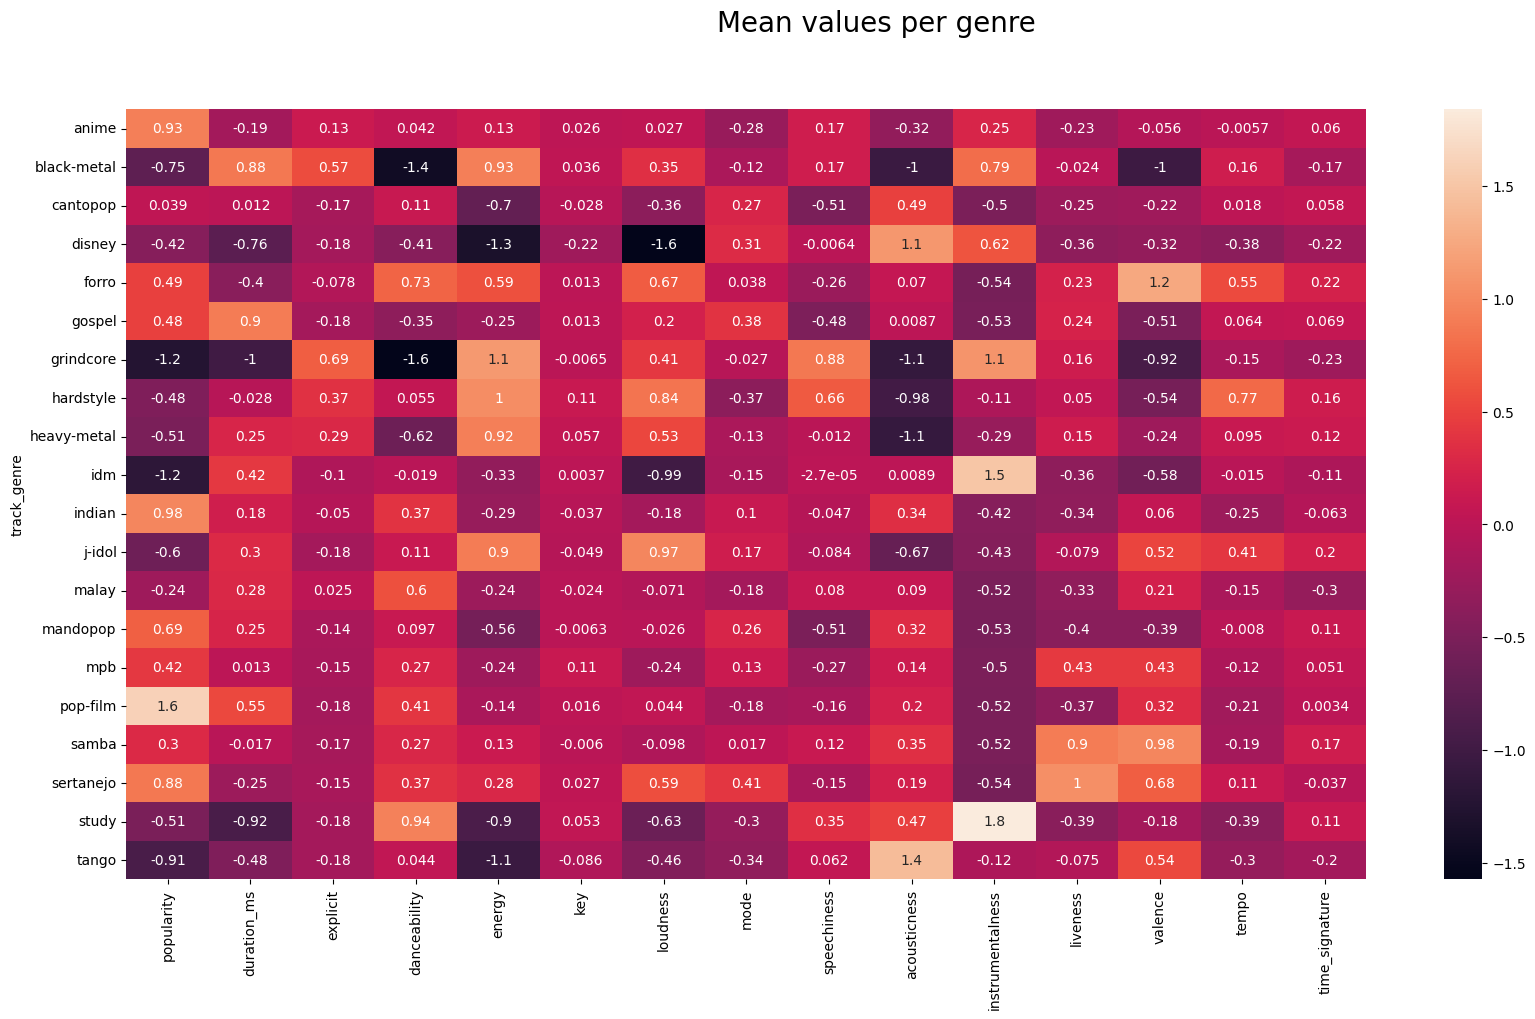

In [ ]:
# Examine the predictor variable means per genre
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.groupby('track_genre').mean(),annot=True)
plt.suptitle('Mean values per genre', fontsize=20)

As illustrated by the mean values per feature per genre, some of the class imbalance in the predictor variables are associated with specific classes in the response variable `track_genre`. For instance, `explicit`-ness is expecially present in genres like grindcore, black-metal, an hardstyle while genres like sertanejo, gospel, and disney lean toward being on a major scale.

Text(0.5, 0.98, 'Correlation Matrix between Predictor Variables')

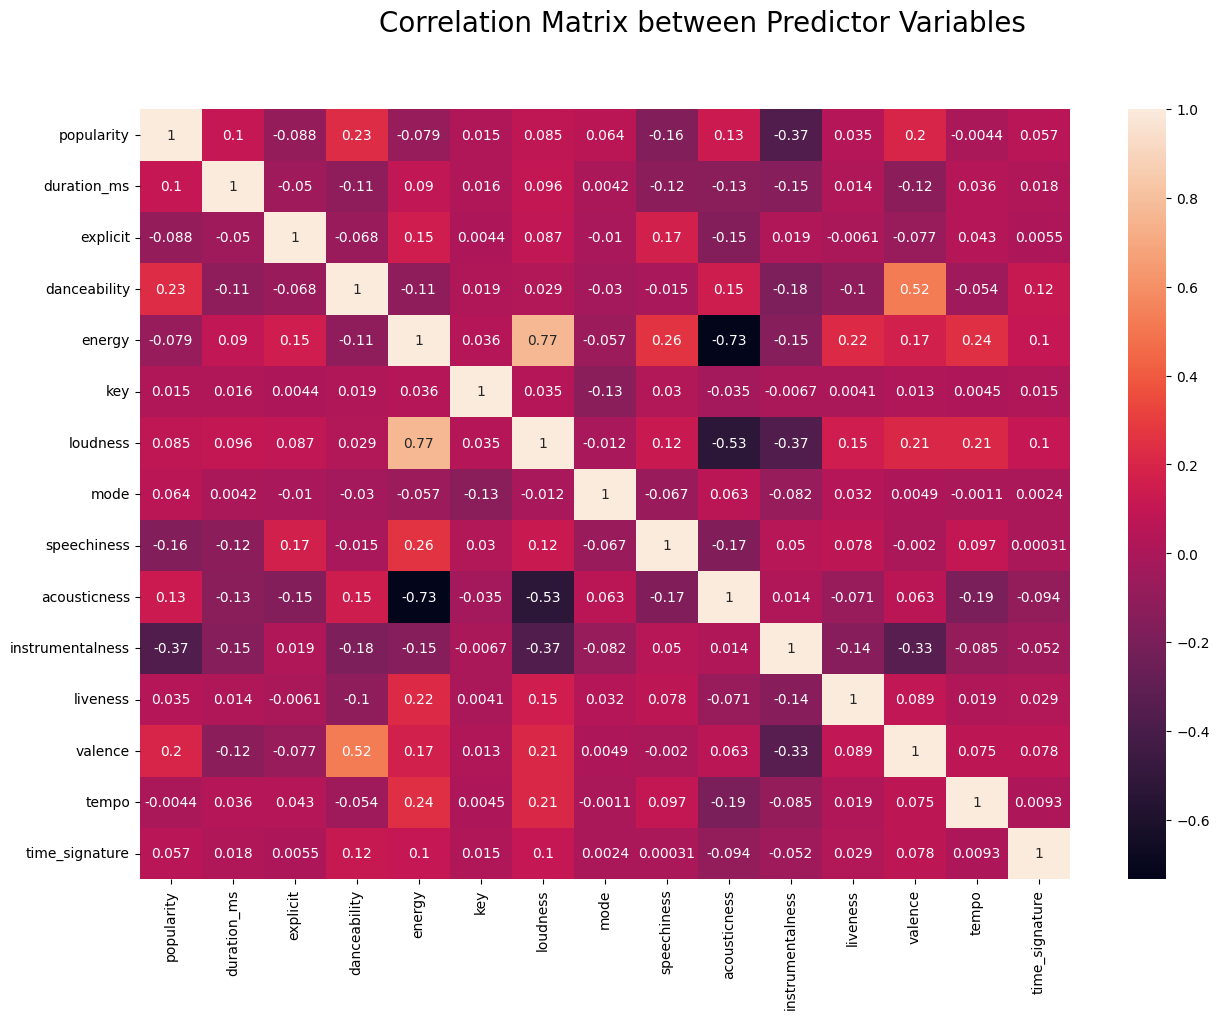

In [ ]:
# Plot the correlation matrix between predictor variables
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.drop(columns=['track_genre']).corr(),annot=True)
plt.suptitle("Correlation Matrix between Predictor Variables", fontsize=20)

It is important to note the following highly-correlated features since modeling techinques (e.g. logistic regression) can make assumptions about the absence of multicollinearity.

* valence and danceability: 0.52
* energy and loudness: -0.73
* energy and acousticness: -0.73
* loudness and acousticness: -0.53

The scatterplots below illutrates how their relationships are non-linear.

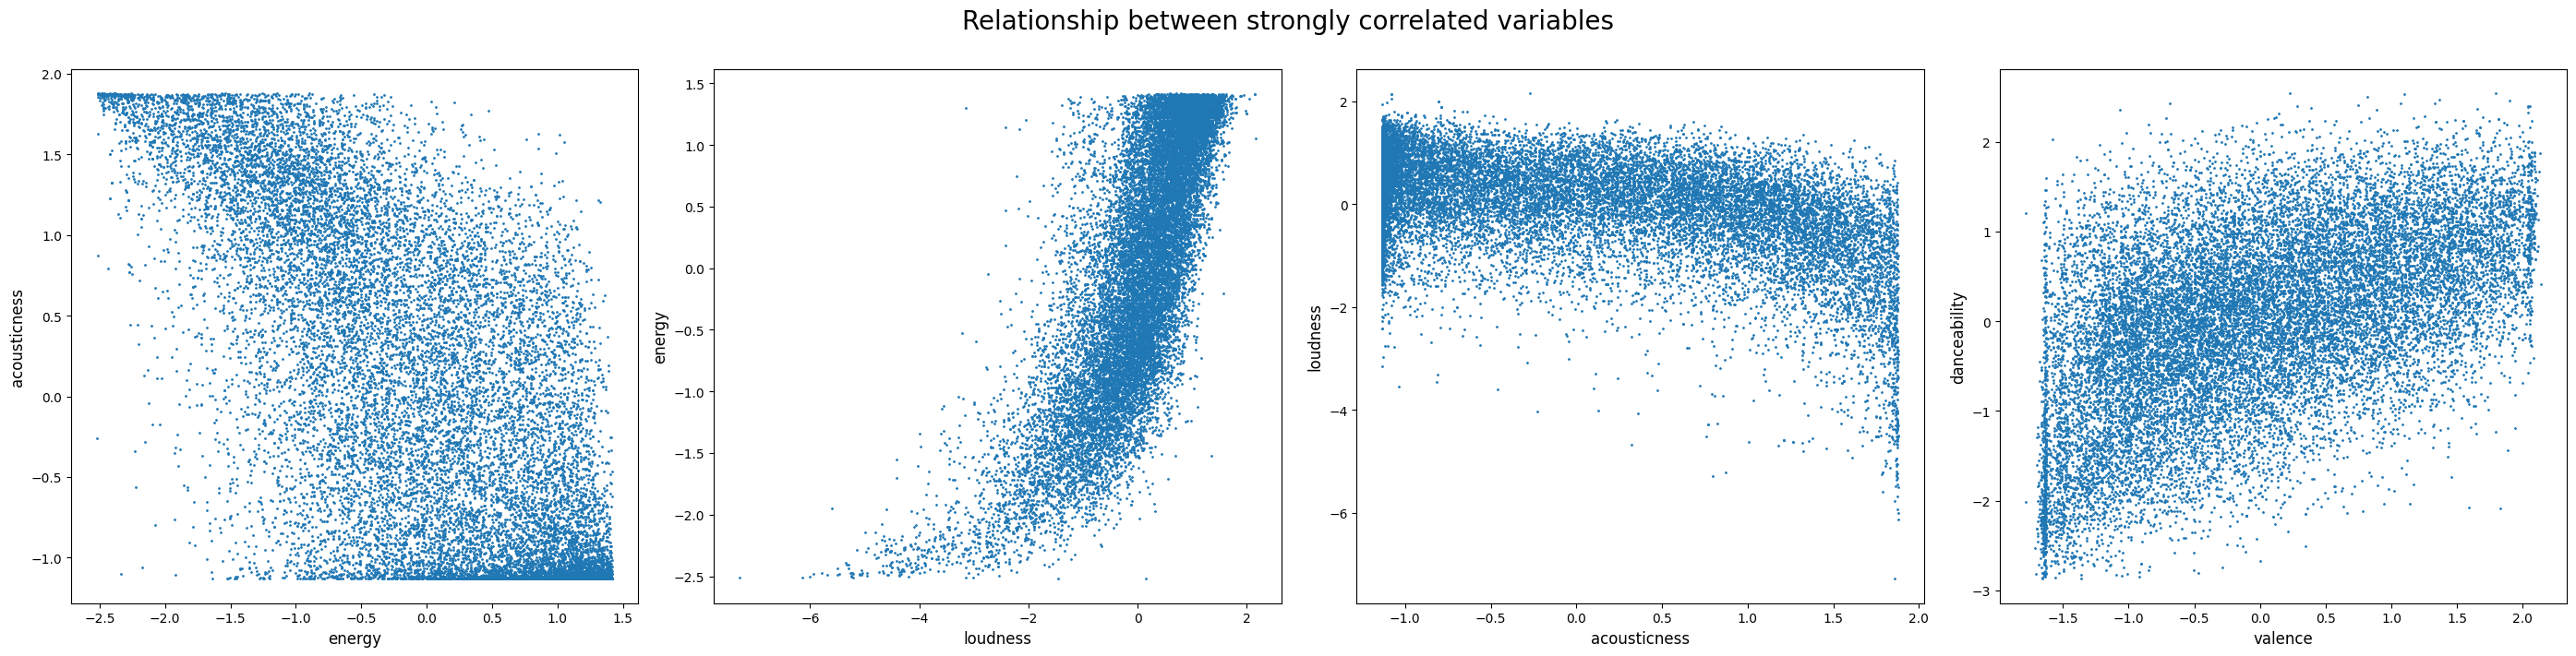

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(28,7))
axs[0].scatter(df['energy'], df['acousticness'], s=1)
axs[0].set_xlabel('energy', fontsize=12)
axs[0].set_ylabel('acousticness', fontsize=12)
axs[1].scatter(df['loudness'], df['energy'], s=1)
axs[1].set_xlabel('loudness', fontsize=12)
axs[1].set_ylabel('energy', fontsize=12)
axs[2].scatter(df['acousticness'], df['loudness'], s=1)
axs[2].set_xlabel('acousticness', fontsize=12)
axs[2].set_ylabel('loudness', fontsize=12)
axs[3].scatter(df['valence'], df['danceability'], s=1)
axs[3].set_xlabel('valence', fontsize=12)
axs[3].set_ylabel('danceability', fontsize=12)

plt.suptitle("Relationship between strongly correlated variables", y=1.01, fontsize=20)
plt.tight_layout()
plt.show()

We can further explore the relationship between each numerical feature's distribution and each categorical feature via the density plots below.

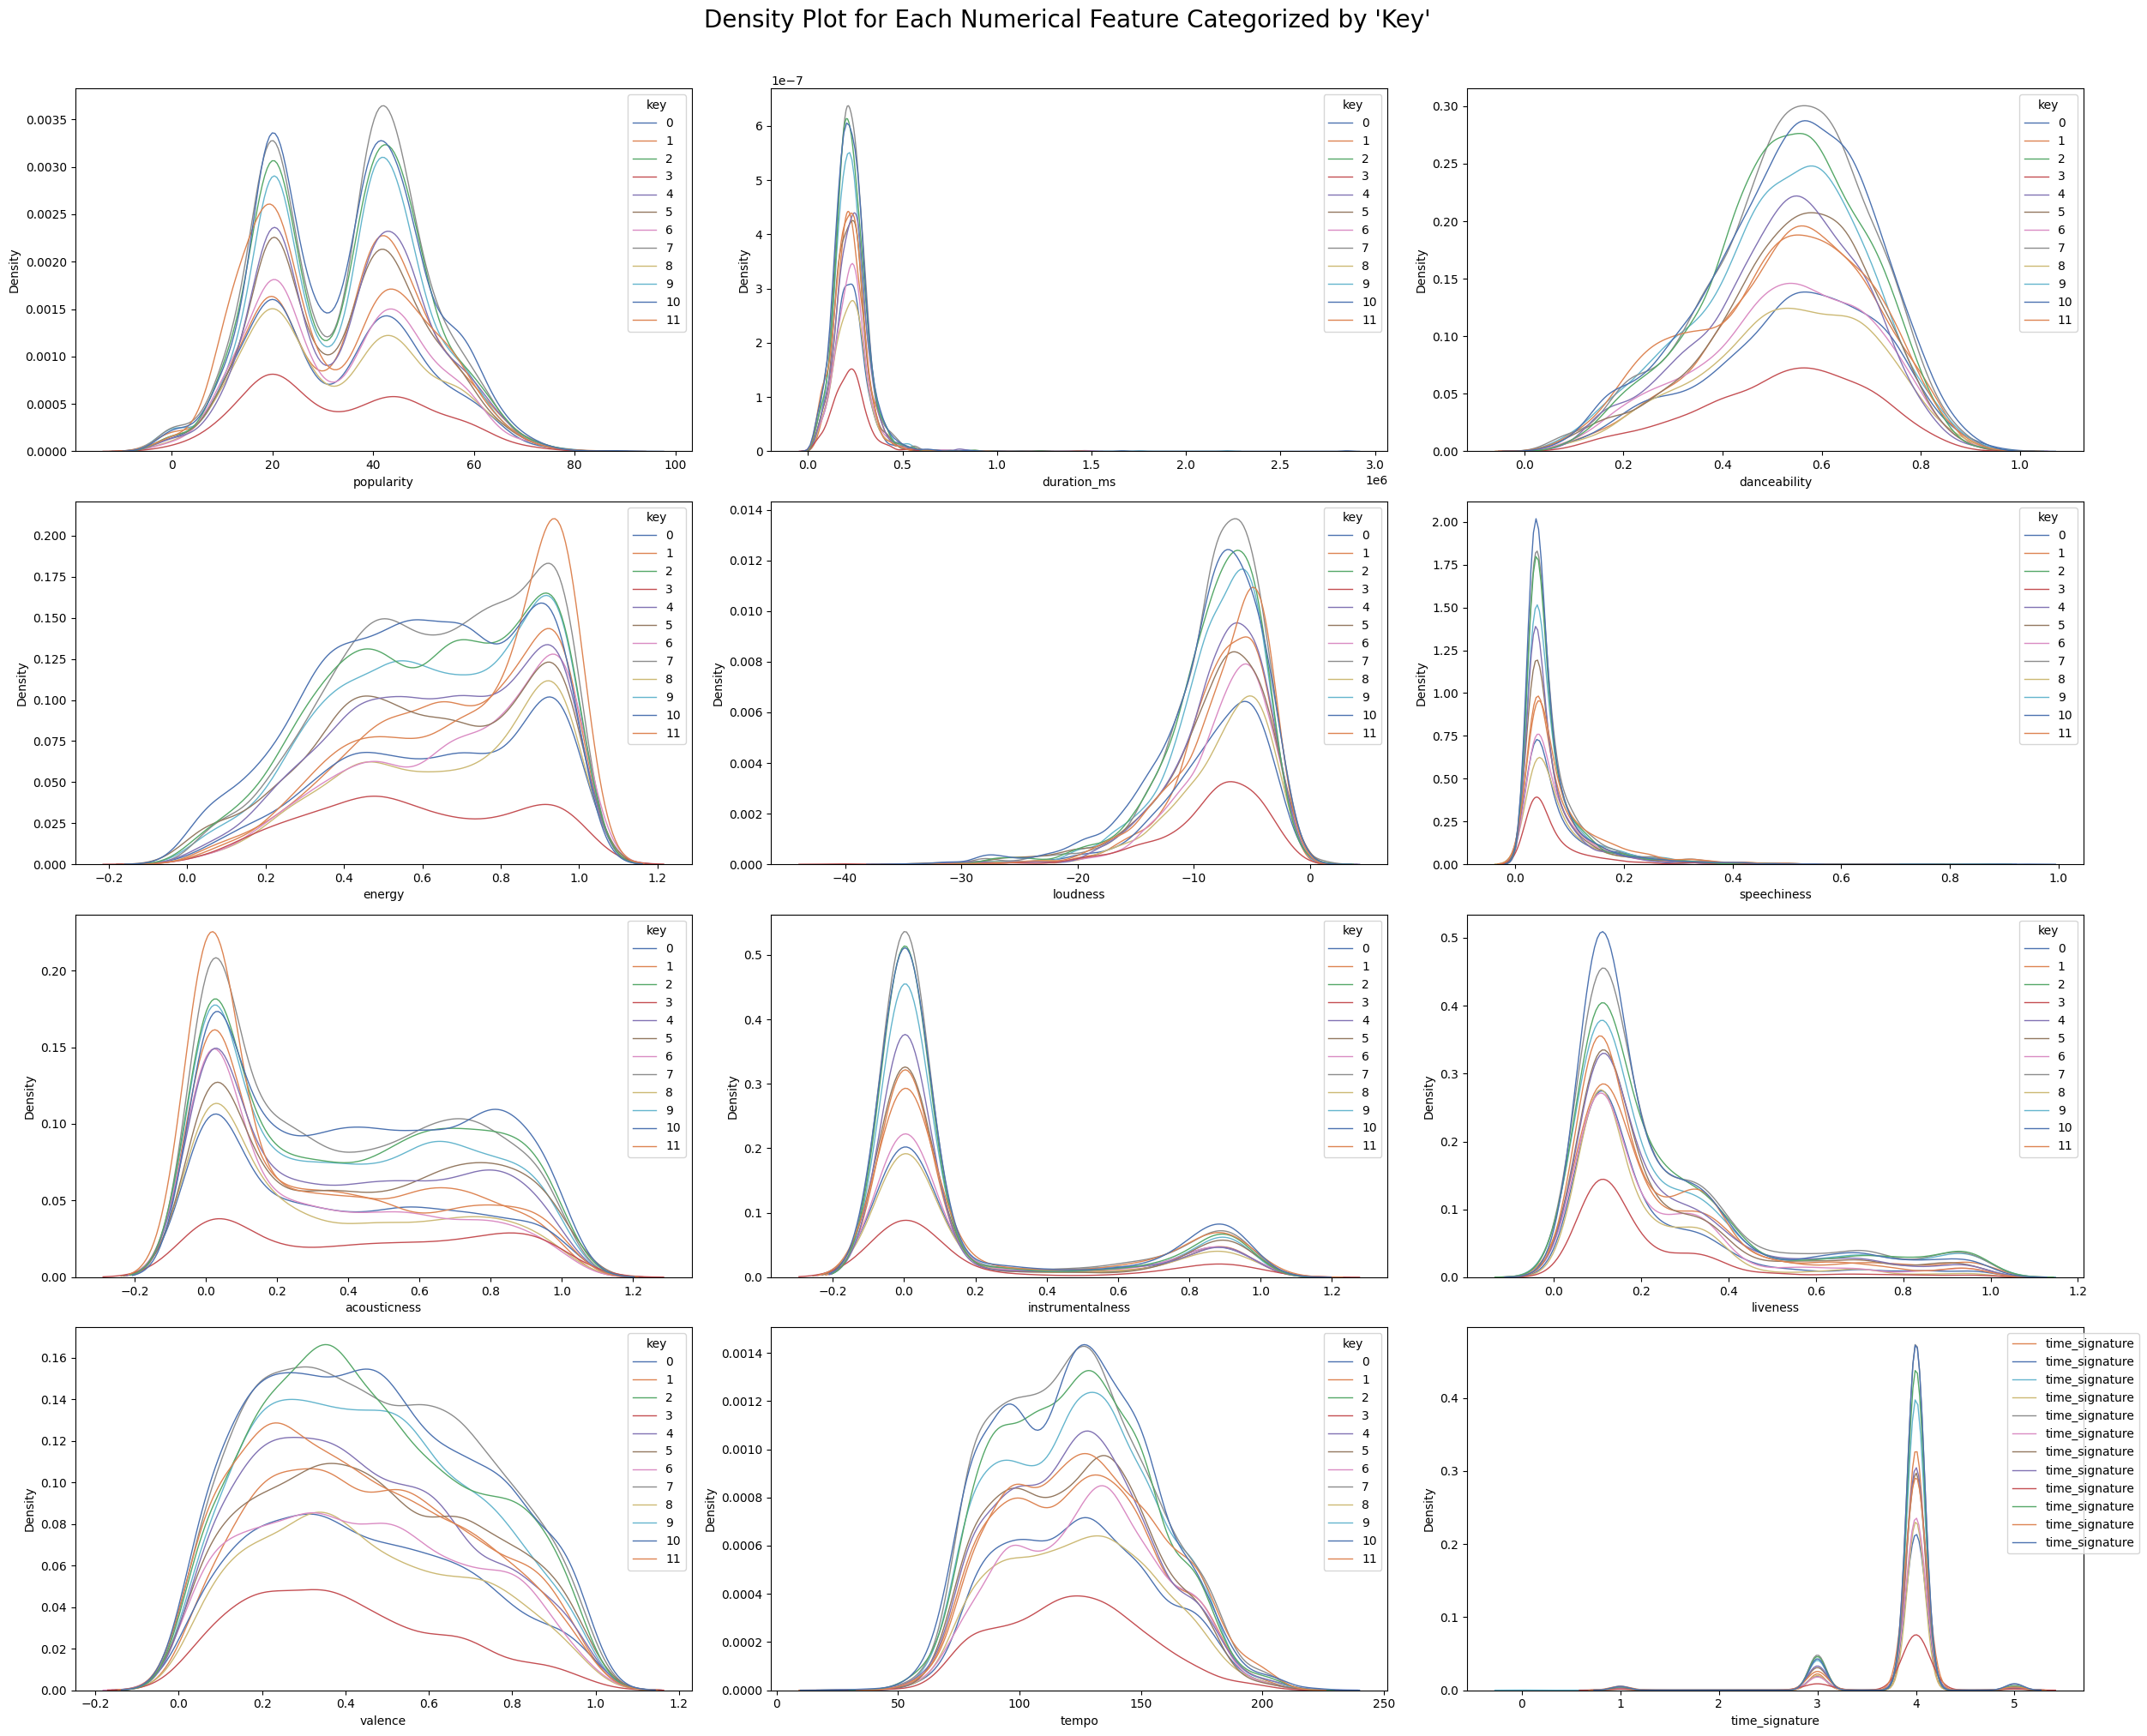

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(4,3, figsize=(25,20))
i=0
j=0
# Loop through the columns and create a KDE plot for each
for col in df_raw.drop(columns=['track_genre','mode','explicit','key']).columns:
    sns.kdeplot(df_raw[[col,'key']], x=col, ax=ax[i][j], label=col, lw=1, palette='deep', hue='key')
    j+=1
    if j==3:
      j=0
      i+=1

# Add a legend and title
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
plt.suptitle("Density Plot for Each Numerical Feature Categorized by 'Key'", y=1.01, fontsize=20)
plt.tight_layout()
plt.show()

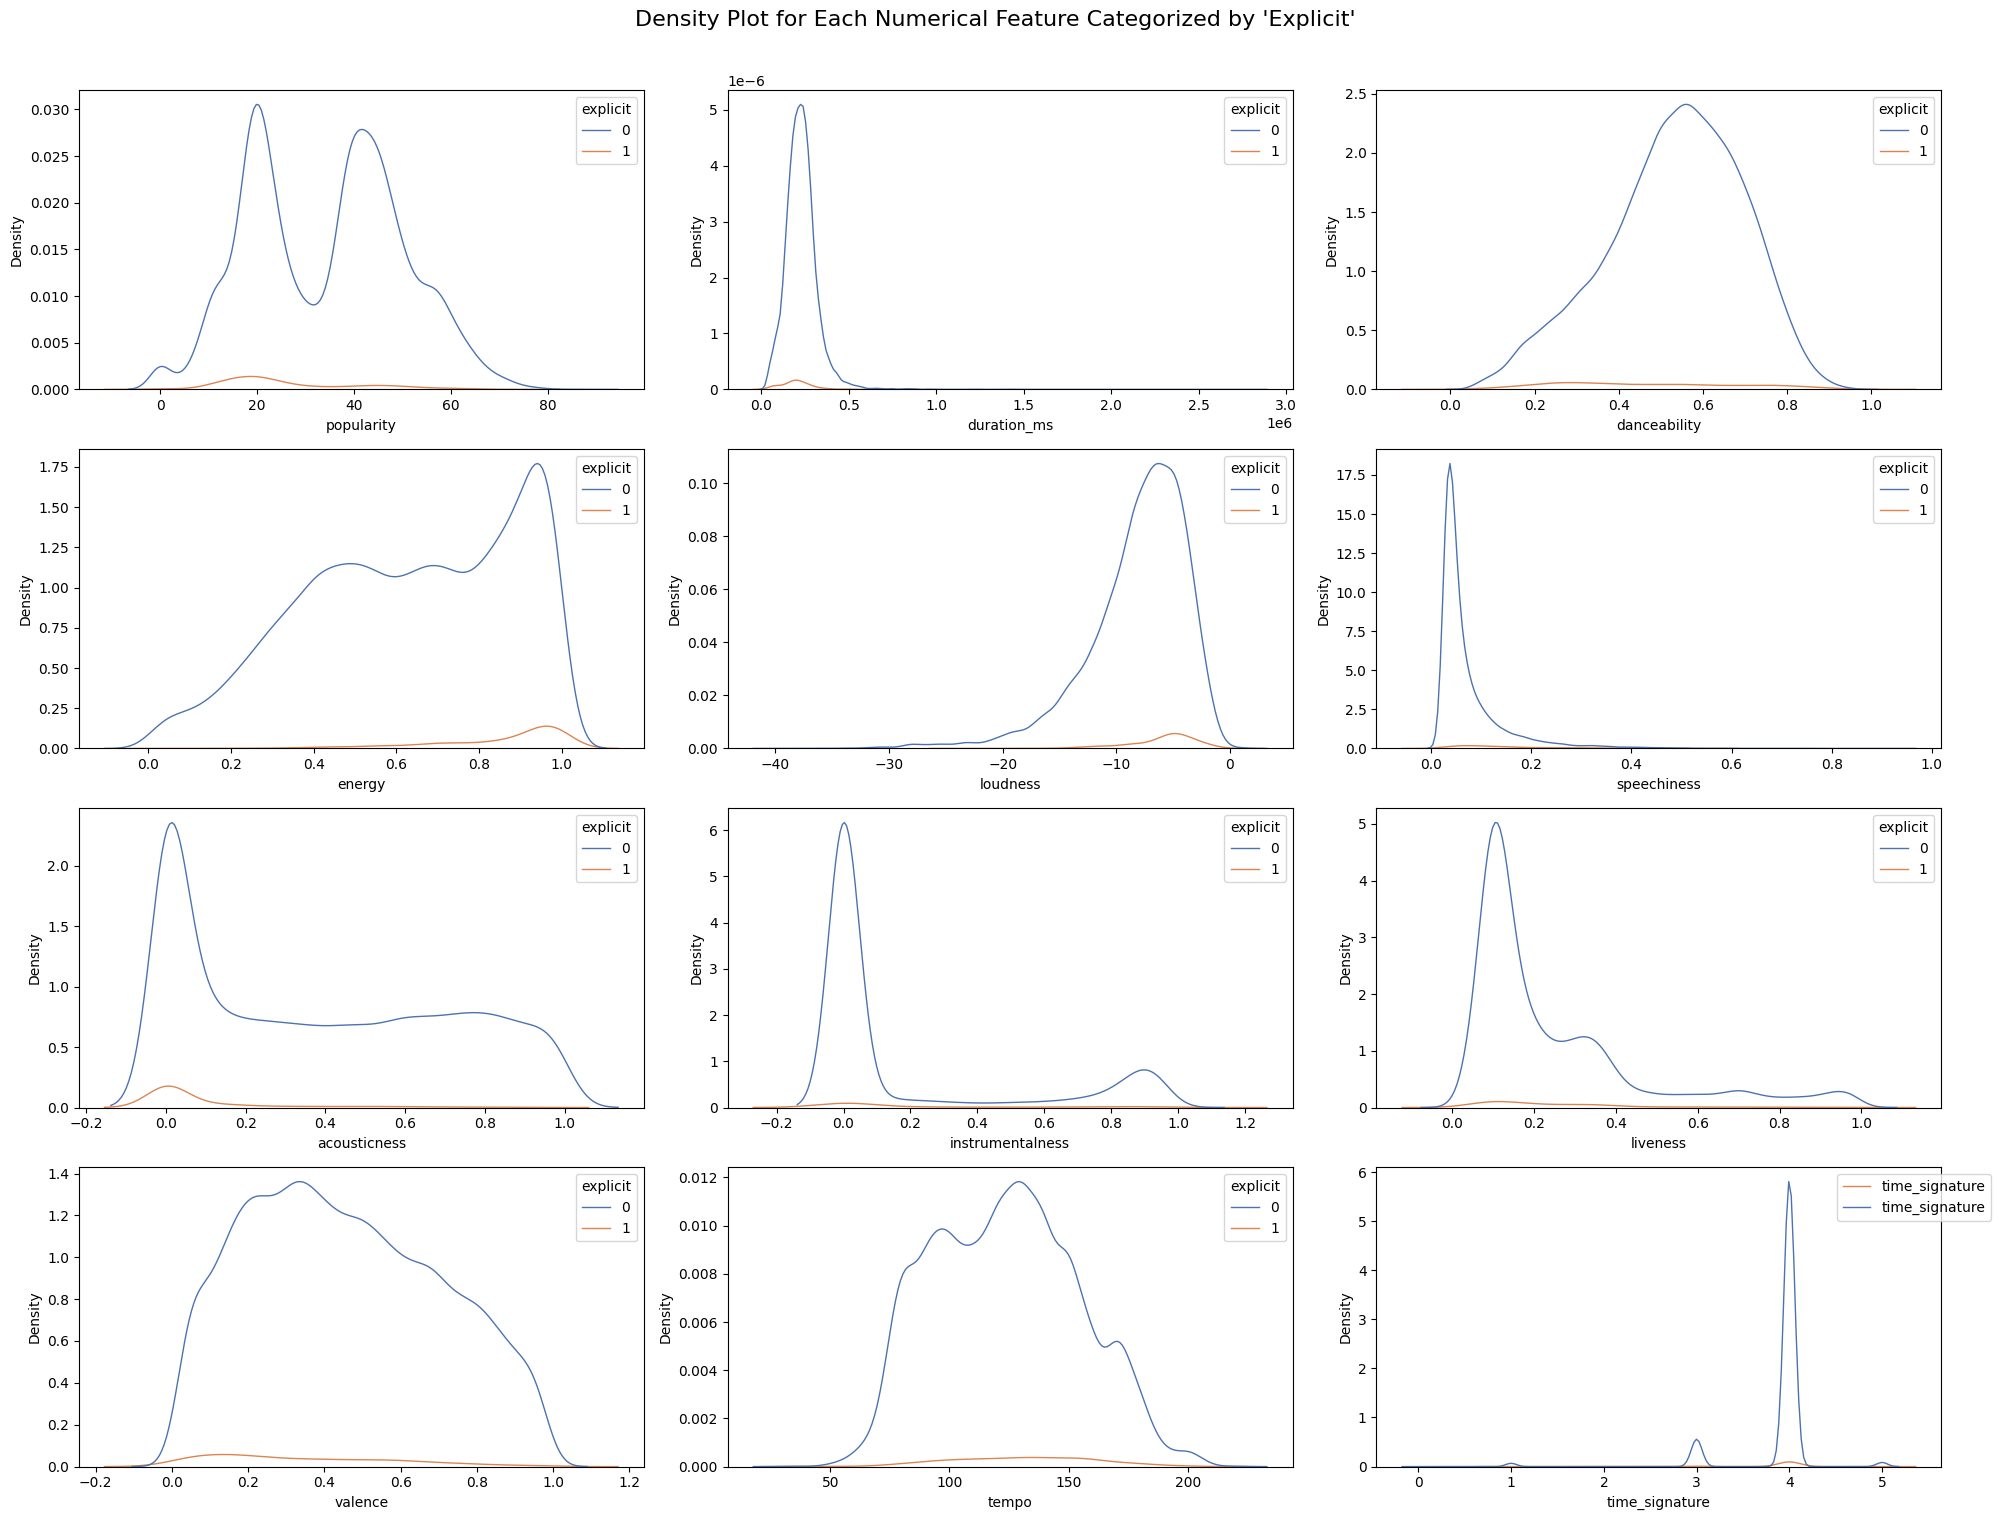

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(4,3, figsize=(20,15))
i=0
j=0
# Loop through the columns and create a KDE plot for each
for col in df_raw.drop(columns=['track_genre','mode','explicit','key']).columns:
    sns.kdeplot(df_raw[[col,'explicit']], x=col, ax=ax[i][j], label=col, lw=1, palette='deep', hue='explicit')
    j+=1
    if j==3:
      j=0
      i+=1

# Add a legend and title
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
plt.suptitle("Density Plot for Each Numerical Feature Categorized by 'Explicit'", y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

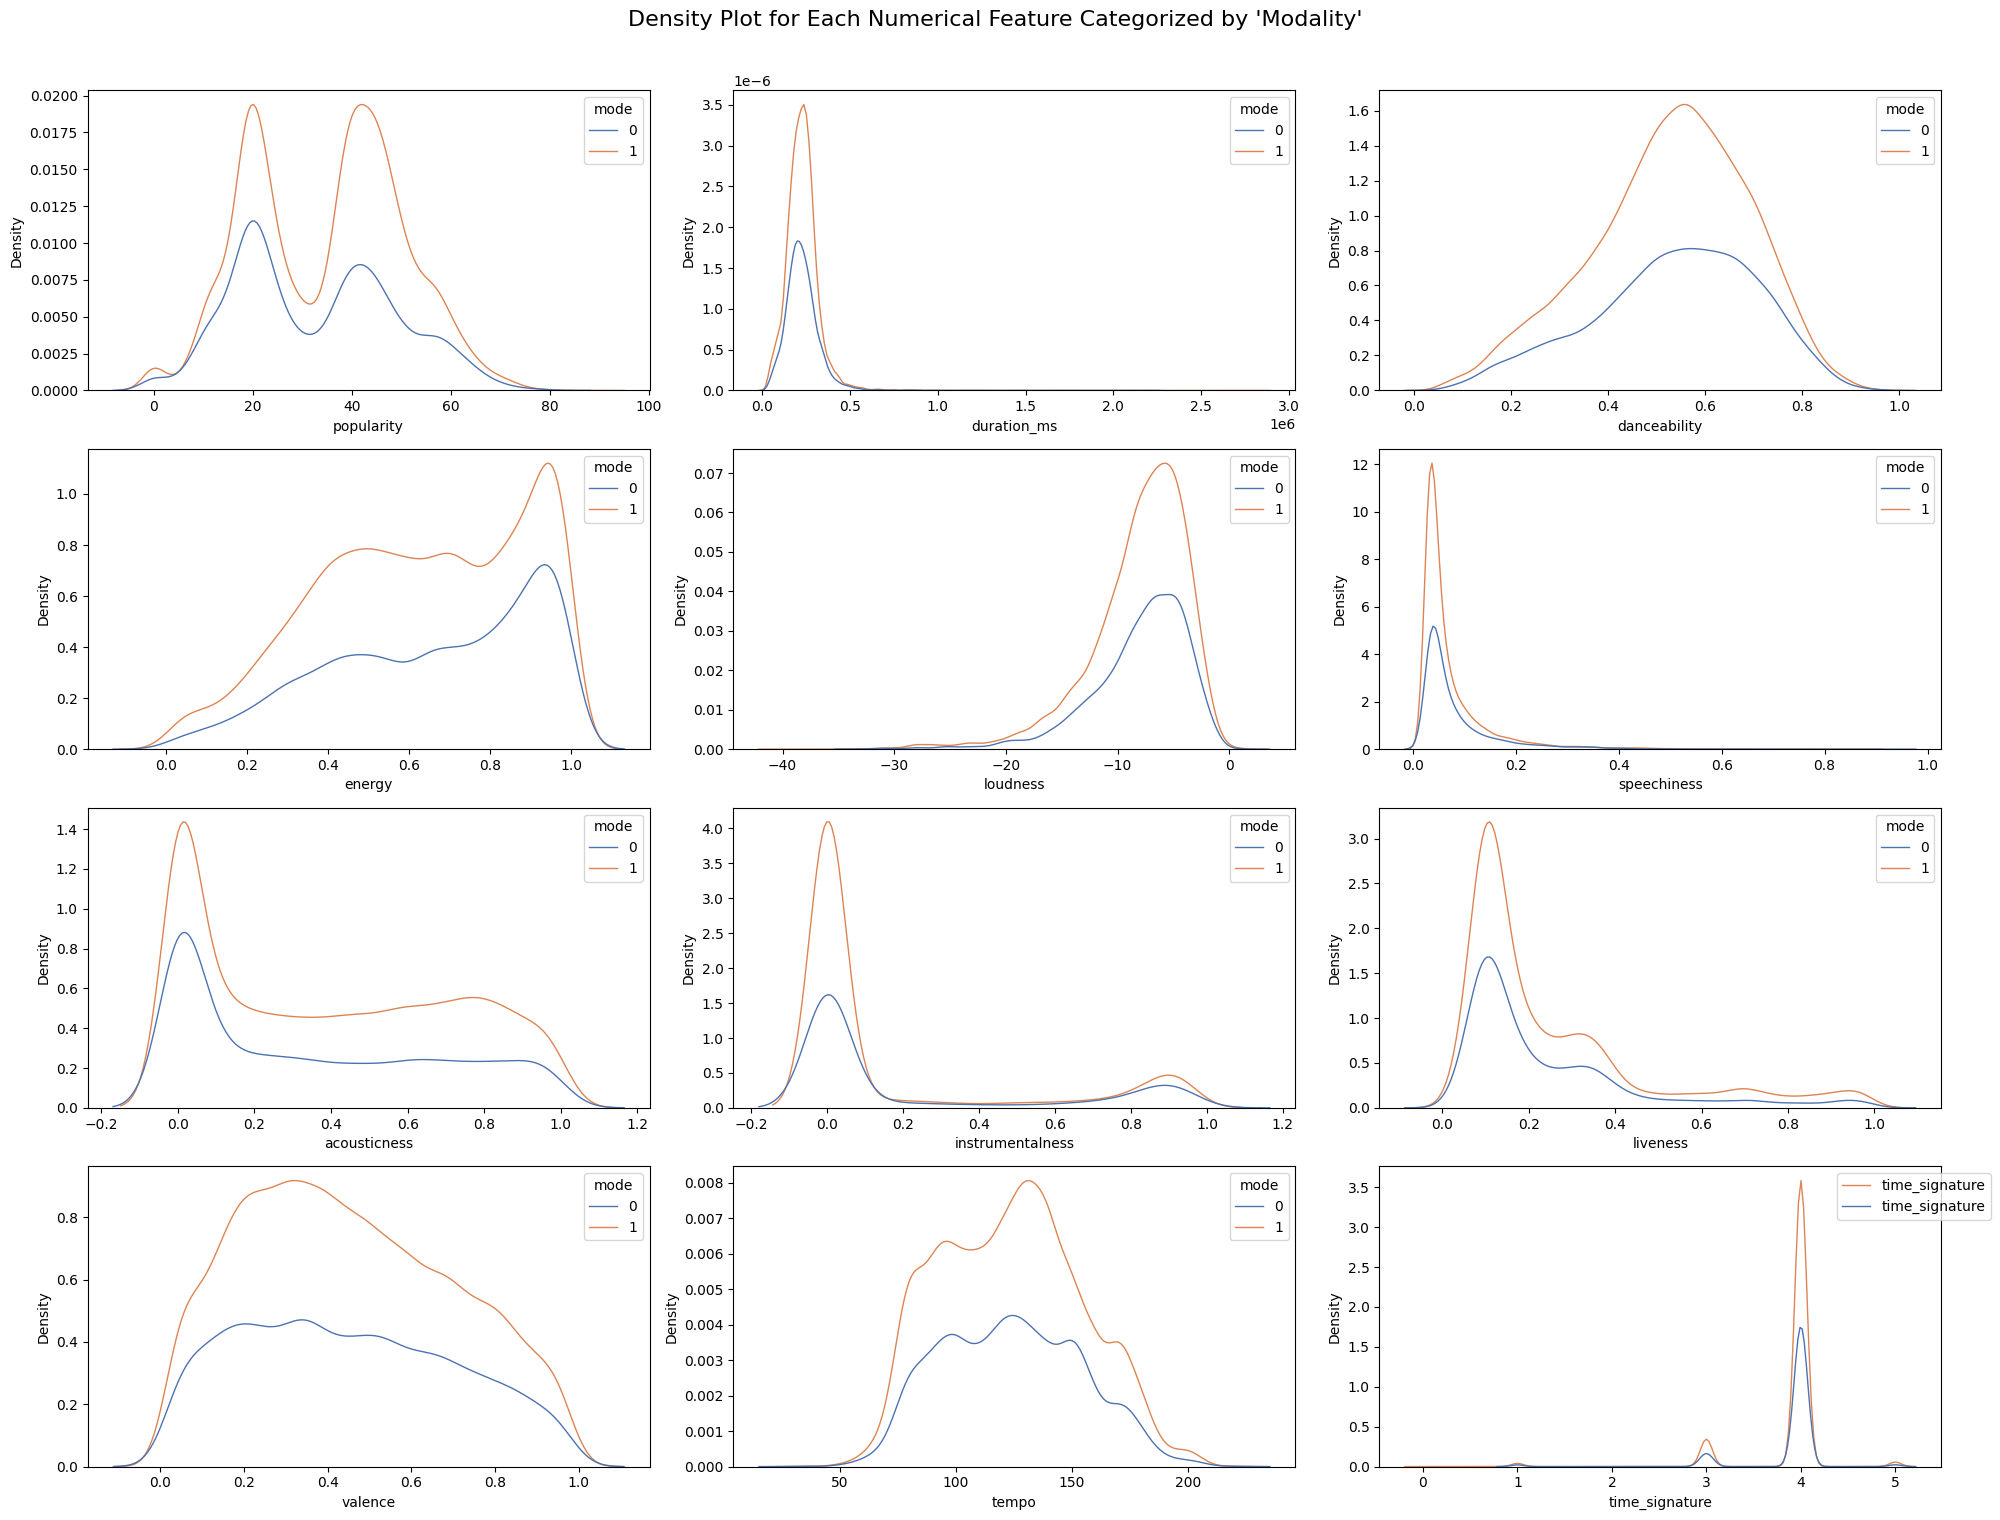

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(4,3, figsize=(20,15))
i=0
j=0
# Loop through the columns and create a KDE plot for each
for col in df_raw.drop(columns=['track_genre','mode','explicit','key']).columns:
    sns.kdeplot(df_raw[[col,'mode']], x=col, ax=ax[i][j], label=col, lw=1, palette='deep', hue='mode')
    j+=1
    if j==3:
      j=0
      i+=1

# Add a legend and title
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
plt.suptitle("Density Plot for Each Numerical Feature Categorized by 'Modality'", y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

We can also visualize the class distribution per genre for every categorical feature.

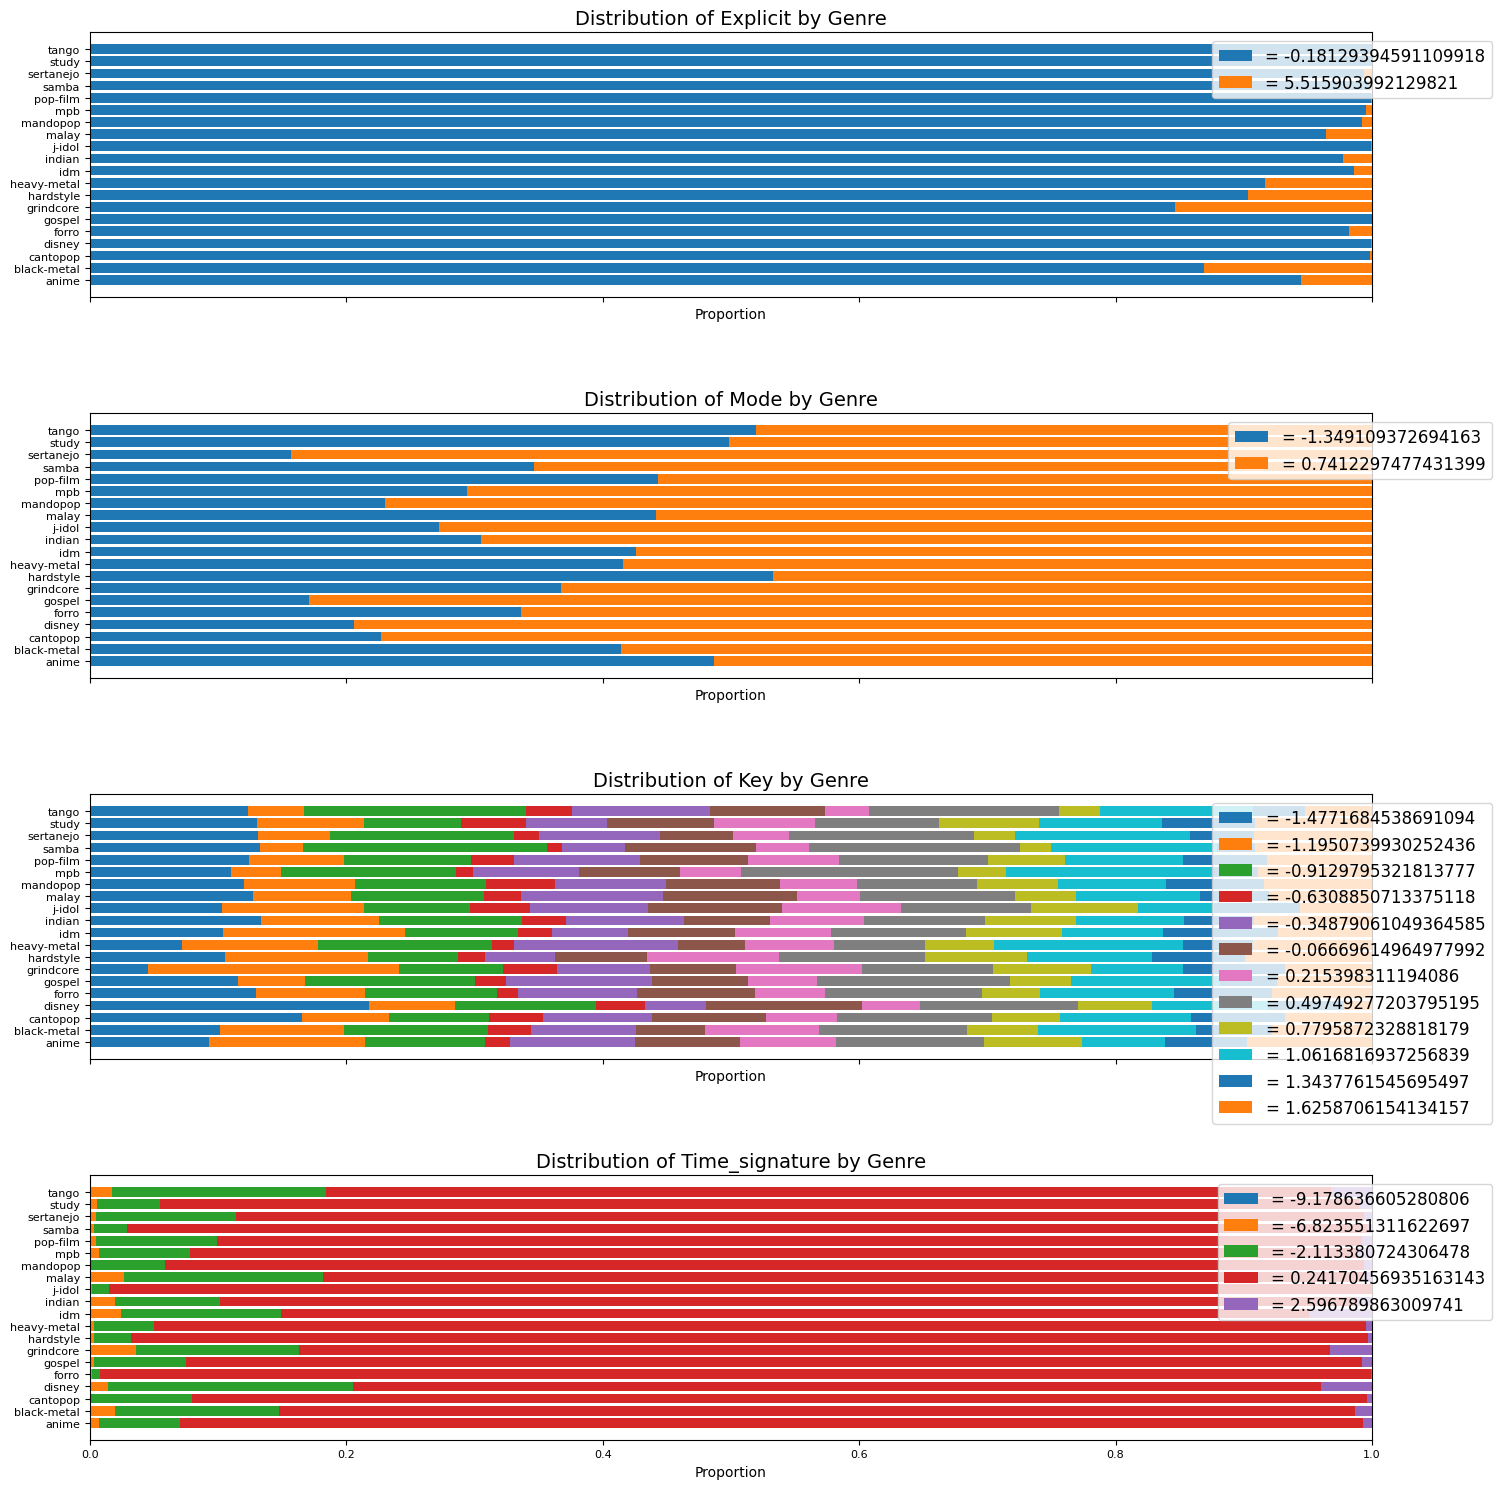

In [ ]:
# calculate the class proportions for each categorical feature
proportions = {}
for col in ['explicit', 'mode', 'key', 'time_signature']:
    proportions[col] = (df.groupby('track_genre')[col].value_counts(normalize=True).unstack(fill_value=0))


fig, axes = plt.subplots(4, 1, figsize=(15, 15), sharex=True)
genres = df['track_genre'].unique()  # 20 unique genres

# plot each category in a separate subplot
for ax, (col, prop_df) in zip(axes, proportions.items()):
    left_pos = np.zeros(20) # bars intialized at leftmost position

    # plot each class as a stacked bar
    for col_class in prop_df.columns:
        ax.barh(genres,
            prop_df[col_class].reindex(genres, fill_value=0),  # index replaced with genres
            left=left_pos,  # stack this class's bars on top of previous bars
            label=f"= {col_class}") # legend label
        left_pos += prop_df[col_class].reindex(genres, fill_value=0)

    ax.set_title(f"Distribution of {col.capitalize()} by Genre", fontsize=14)
    ax.set_xlabel("Proportion", fontsize=10)
    ax.set_xlim(0, 1)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='upper right',bbox_to_anchor=(1.1, 1),fontsize=12)

plt.tight_layout()
plt.show()